In [16]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

In [34]:
def kmeans(k,datapoints):

    d = len(datapoints[0]) 
    Max_Iterations = 1000
    i = 0
    
    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)
    
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        cluster_centers += [random.choice(datapoints)]
        
        force_recalculation = False
    
    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :
        
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
    
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c  
        
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): 
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                else: 
                    new_center = random.choice(datapoints)
                    force_recalculation = True
                    print ("Forced Recalculation...")
                    
            
            cluster_centers[k] = new_center
    
        
    #print ("Clusters", cluster_centers)
    #print ("Iterations",i)
    #print ("Assignments", cluster)
    return cluster_centers
    
    

[6.812765957446806, 3.0744680851063824]
[5.773584905660377, 2.692452830188679]
[6.812765957446806, 5.773584905660377]
[[4.575, 3.2166666666666672], [4.8999999999999995, 3.0928571428571425], [5.283333333333333, 3.7083333333333335]]
[[6.633333333333334, 3.033333333333333], [5.300000000000001, 2.4181818181818184], [5.8851851851851835, 2.7962962962962967]]
[[7.475000000000001, 3.125], [6.55, 3.0583333333333336], [5.892857142857143, 2.7]]


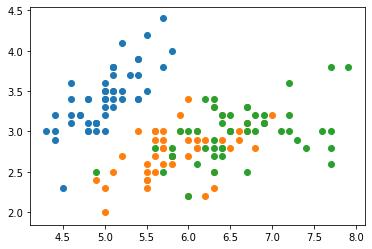

In [61]:
data = pd.read_csv("../../Sem 6/Practical/Iris.csv")
#datapoints = data.iloc[:, [1, 2]].values
#plt.scatter(datapoints[:,0], datapoints[:,1],cmap='rainbow')

species_list = list(data["Species"].unique())

X1=data.loc[data["Species"] == species_list[0]]
X2=data.loc[data["Species"] == species_list[1]]
X3=data.loc[data["Species"] == species_list[2]]

y1 = X1.iloc[:, [1, 2]].values
y2 = X2.iloc[:, [1, 2]].values
y3 = X3.iloc[:, [1, 2]].values
plt.scatter(y1[:,0],y1[:,1])
plt.scatter(y2[:,0],y2[:,1])
plt.scatter(y3[:,0],y3[:,1])



k = 3 # K - Number of Clusters
a1=kmeans(k,y1)
a2=kmeans(k,y2)
a3=kmeans(k,y3)
'''
plt.scatter(a1[:,0], a1[:,1])
plt.scatter(a2[:,0], a2[:,1])
plt.scatter(a3[:,0], a3[:,1])
'''
#plt.scatter(a[:, 0], a[:,1], c = 'red', s=50, label = 'Centroids')
c=[]
x=len(a)
for i in range (1,x):
    print(a[i])
    c.append(a[i][0])
print(c)
print(a1)
print(a2)
print(a3)